# Youth Perception of Sexual Education in India
****

For my project, I have chosen to analyze data from a survey I conducted in May 2020 with the goal of discerning what the youth of India thinks about the Indian Sexual Education curriculum. While India continues to make phenomenal progress in global fields, there is one particular platform in which it still lacks direction and growth - Education, particularly **Sexual Education (Sex Ed)**. While countries like USA have State specific laws that target the implementation of Sex Ed in schools, until very recently, India was still debating the merits of including it in the curriculum at all. A recent Instagram scandal in May 2020, termed the **'Bois Locker Room'** made headlines when a group of adolescent boys were outed by their classmates for a group chat that perpetuated rape culture, objectification of women and criminal behaviors of morphing private photographs of women. While there are many nuances to this issue, it brought to the forefront the need to destigmatize sexual culture amongst teenagers and facilitate dialogue within the education systems on topics that are still considered taboo - topics such as safe sex, gender identity, attraction, consent etc. from more than a paltry biological point of view. 

The 'Bois Locker Room' event made me feel complicit to a system that deliberately denies students the tools to make well-adjusted choices about their lives and instead polices them morally, resulting in disastrous consequences. I've always thought that inculcating Sex Ed topics into a supportive and fact-based school curriculum would prevent the hazard of misinformation that teenagers have to sift through every day. In a study conducted by the Indian Ministry of Women and Child development in conjunction with UNICEF in 2007 showed that 53% of children in India faced sexual abuse of some kind and a majority of those went unreported. Academia has shown time and again that Sex Ed plays a major role in sexual violence prevention. Drawing from that, it is also my opinion that de-stigmatization and normalization of sexual topics will lead to better adjusted adolescents who understand concepts of consent & safe sex and will eventually lead to lower sexual harassment cases or crimes. 

## Survey Parameters

The survey was conducted via Google forms and was anonymous. It was restricted to Indians in the age-group of 16-28. Any Board of educational curricula (International Baccalaureate, ICSE, IGCSE etc.) was accepted as long as the individual completed High School in India. The main question I ask in this survey, is the following:
_<h2><center>“What do the youth perceive sexual education in India as?”</center></h1>_
I picked this question given that the main goal of the research is to present it to Education Technology or Educational Reform institutions in order to help curate a curriculum that caters to what the youth wants. I believe that the survey will indicate their dissatisfaction with the current curriculum. It's an ambitious question and to help break it down, I have organized the notebook into sections that correspond to different questions. Currently, the survey has 112 responses.

## Process 

### 1. Demographic Survey Data
- Analyze and visualize the demographic distribution of the participants in order contextualize findings and understand potential biases in the data set. For instance, is the sample representative of my target population of the youth of India? 

### 2. Perceptual and Curricular Data
- Out of a corpus of topics covering "taboo" topics directly or indirectly connected to Sex Ed, which topics were considered the most important by the participants?
- How often were these topics addressed by their school? 
- Have the participants experienced sexual policing by an authority figure in their schooling environment?

    **Tools:** For both (1) and (2), I used the pandas library for data manipulation and matplotlib and seaborn libraries for visualizing the results. 
    
### 3. Textual Analysis of Free Response Data
- Extract topics from the answers of the free response question in the survey 

    **Workflow**:
    1. Text-preprocessing by removing punctuations and stopwords as well as tokenization.
    2. Analyzing word frequencies and visualizing them using Word cloud and Bar plots. 
    3. Using the scikit-learn library (TfidfVectorizer) to create the Document-Term Matrix
    4. Fitting it to a LDA model
    5. Visualizing extracted topics using pyLDAvis
    6. Analyzing the contextual similarity of the words using a Word2Vec model
    7. Interpreting that using a combination of Principle Component Analysis (PCA) and T-distributed stochastic neighbor embedding (TSNE).


In [1]:
#!pip install pyLDAvis
#!pip install wordcloud
from collections import Counter
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews
import numpy as np
import os
import pandas as pd
import pyLDAvis.sklearn
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
import spacy
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Where am I?
%pwd

'/Users/anushasubramanian/Desktop/Project101'

In [3]:
survey = pd.read_csv("Education_survey.csv")
del survey["Add Comments"]

# DEMOGRAPHIC SURVEY DATA
***
With the aim of understanding the distribution of participants and putting the data in context of accessible services, belief systems, and how representative the sample is. It is particularly relevant in a county such as India where pockets of rural and urbanism co-exist.


## Age & High School City of Participants

- Age: Current Age

- High School City: The city participants graduated high school from. 

In [4]:
#extract unique age data from survey
age = dict(survey["Age"].value_counts())
age_df = pd.DataFrame()
age_df["age"] = age.keys()
age_df["frequency"] = age.values()

#extract and clean location data 
city = dict(survey["High School City"].value_counts())
city["Dehradun"] = city["Dehradun "] + city["Calcutta, Dehradun "] + city["Doon"]
del city["Dehradun "], city["Calcutta, Dehradun "], city["Doon"]
city_df = pd.DataFrame()
city_df["City"] = city.keys()
city_df["Frequency"] = city.values()

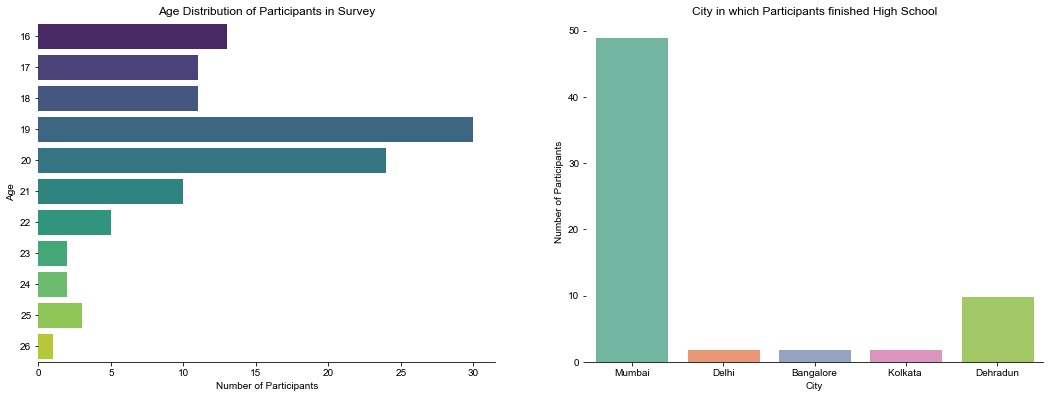

In [5]:
f, axes = plt.subplots(1, 2, figsize =(18,6.27))
                      
#plot age data
#sns.set(rc={'figure.figsize':(10,6.27)})
age_barplot = sns.barplot(x = "frequency", 
                         y = "age", 
                         data = age_df, 
                         orient = "h", palette = 'viridis', ax = axes[0])

age_barplot.set(xlabel = "Number of Participants", ylabel = "Age", title = "Age Distribution of Participants in Survey");

#plot location data
sns.set(rc={'figure.figsize':(10,6.27)})
city_barplot = sns.barplot(x = "City", 
                         y = "Frequency", 
                         data = city_df, 
                         orient = "v", palette = 'Set2', ax = axes[1])
city_barplot.set(xlabel = "City", ylabel = "Number of Participants", title = "City in which Participants finished High School");

sns.despine(left=True)

A large proportion of our participants are in the 19-20 age-group, which means that they very recently graduation from high school. Setting it in context, this was also approximately the age-group that was involved in the *Bois Lockeroom Scandal*.

An overwhelmingly large proportion of participants completed their schooling in Mumbai - a metropolitan city. Since I am from Mumbai, it is possible that the initial dissemination of the survey was largely to a Mumbai based population who them propagated it to their own Mumbai-based networks. I will discuss the limitations of this at the end of this project.  


## Gender Identity of Participants

Self-report measure of what gender participants identify as. 

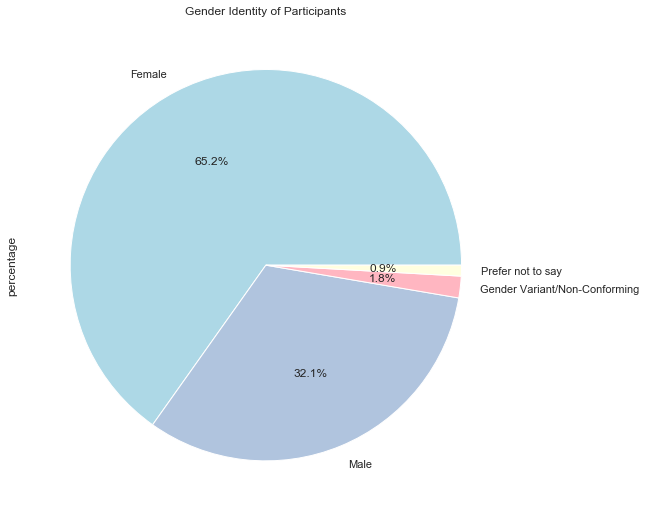

In [6]:
#extract gender data
gender_df = pd.DataFrame(index = ['Female','Male','Gender Variant/Non-Conforming', 'Prefer not to say'])
freq = list(survey["Gender Identity"].value_counts())
gender_df["percentage"] = freq

#plot gender pie chart
gender_pie = gender_df.plot.pie(y = "percentage", figsize = (9,9), autopct ='%1.1f%%',
                             colors = ["lightblue","lightsteelblue", "lightpink", "lightyellow"], legend = False);
plt.title("Gender Identity of Participants");



India is still fairly conservative when it comes to recognizing non-binary gender identities. This could account for the very low proportion of such individuals in the sample. 

More than half the sample of participants identified as female. This could be due to dissemination in gender-skewed networks (I sent them out to more females and they in turn sent it to more-oriented networks and so on), the tendency of particular genders to respond more actively to online surveys than others, or even the cultural need to conform to the binary (individuals who would categorize themselves as non-binary in private were hesitant to do so on a survey).


## Spectrum of Religious Affiliations

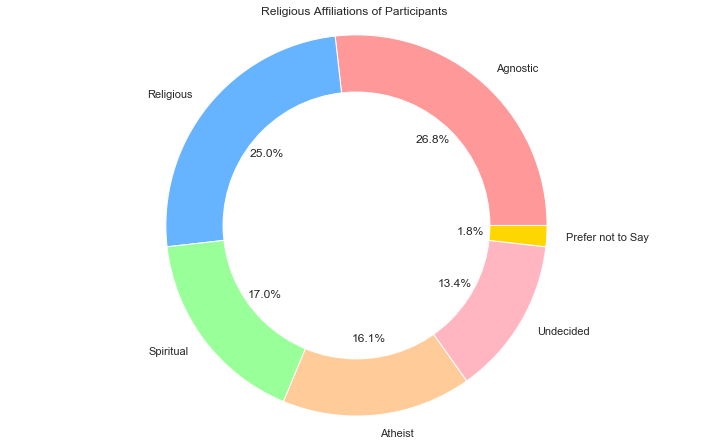

In [7]:
# Pie chart 

religion = dict(survey["Religious Affiliation "].value_counts())

#Cleaning up repeat data in the survey 
religion["Undecided"] = religion["Still in the process of understanding concept of religion and god"] + religion["No clue "]
del religion["Still in the process of understanding concept of religion and god"], religion["No clue "]

#define variables for the pie-chart
sizes = list(religion.values())
labels = ["Agnostic","Religious","Spiritual","Atheist","Undecided","Prefer not to Say"]

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','lightpink',"gold"]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Religious Affiliations of Participants")
plt.tight_layout()
plt.show()


The youth sampled in this survey can be considered representative of the various religious modes of thought prevalent in India. However, I would be careful to assume that they were representative of religions themselves since I didn't ask for particular religious ties such as Hinduism or Islam etc.

# PERCEPTUAL AND CURRICULAR SURVEY DATA
***

Students were asked to answer various forced-choice or rating questions regarding a list of topics relevant directly or indirectly to sexual education. The topics were descriptive because it is near impossible to encapsulate the range of concepts like "mental health" or "sexual health" under one umbrella term. However, to increase ease of understanding and readability of code, the descriptive topics have been shortened. A table of reference is provided below.

|Shortened Form |Description
|:-:|:-:
|svsh|Sexual/Domestic Violence and Identifying Workplace Harassment
|mental_health|Comprehensive Mental Health Awareness, Assessments & Resources
|bullying|Tackling Bullying & Identifying Toxic Environments
|sex_ed|Comprehensive Sex Education beyond basic reproduction (safe sex, consent, pleasure, desire)
|gender_identity|Gender Identity & Sexuality
|menstruation|Normalization of Menstruation
|cyber_crime|Comprehensive understanding of Cyber Etiquettes, Crimes, Laws


## Which topics were rated the highest in importance by the participants?

Participants were asked to rate the importance of including the topics listed above in their school curriculum, on a 0-5-point scale. I summed the individual scores obtained by each topic. The graph depicts the cumulative score out of 560.

In [8]:
#sum the columns
ratings = pd.DataFrame()
topics = ["svsh","mental_health","bullying","sex_ed","gender_identity","menstruation","cyber_crime"]
freq = [survey["Imp SVSH"].sum(),survey["Imp Mental Health"].sum(),survey["Imp Bullying"].sum(),survey["Imp Sex Ed"].sum(),
        survey["Imp Gender Identity "].sum(),survey["Imp Menstruation"].sum(),survey["Imp Cyber Crime"].sum()]
ratings["topics"] = topics
ratings["score"] = freq
ratings.sort_values(by = 'score', inplace = True, ascending = False)

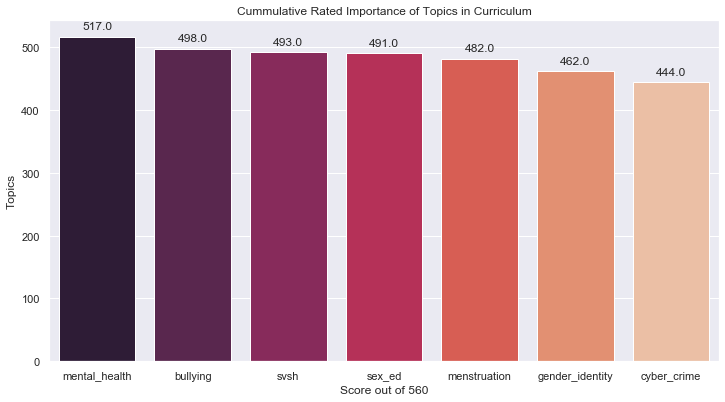

In [9]:
#plot barplot
sns.set(rc={'figure.figsize':(12,6.27)})
imp_barplot = sns.barplot(x = "topics", y = "score", data = ratings, palette = 'rocket', orient = "v");
imp_barplot.set(xlabel = "Score out of 560", ylabel = "Topics", 
                title ="Cummulative Rated Importance of Topics in Curriculum");
for p in imp_barplot.patches:
    imp_barplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


I expected more variations than this graph depicts. Mental Health and Bullying are the two most important topics according to the participants. However, looking at how close in score the other topics are, it's not surprising because it is possible that a vast majority of teenage/adolescent mental health problems and incidents of bullying are manifestations of issues that arise from improper education and understanding of the topics that rank lower on the graph. Something that struck me as particularly interesting was that Cyber Crime ranked **last** on the list, even though the survey was conducted in the middle of an episode of national outrage regarding a _cyber space_ scandal.


## According to the participants, how often were these topics address in their school?

Participants had to rate on a modified Likert Scale, how often the same topics were addressed in their schools. Oftentimes, Indian officials tout the excuse of the "public is not ready" or the "public doesn't want it" as way of brushing shortcomings aside. This question along with the previous one was incorporated to understand whether there existed a discrepancy between the desire of youth to gain information on taboo topics and the frequency in which such information was disseminated in the educational institutions. 

**Scale**
1. Never
2. Rarely
3. Occasionally
4. Frequently
5. Very Frequently

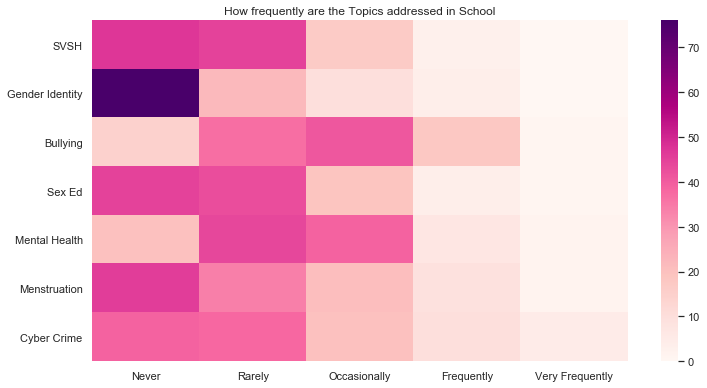

In [10]:
topics = ["SVSH", "Mental Health", "Bullying", "Sex Ed","Gender Identity", "Menstruation", "Cyber Crime"]
metric = ["Never","Rarely","Occasionally","Frequently","Very Frequently"]

#initialise DataFrame
matrix_df = pd.DataFrame(index = topics)

never,rarely, occasionally, freq, vfreq = [],[],[],[],[]

#column numbers we want to extract from survey
columns = [20,21,22,23,24,25,28]

#our data is not tidy. This loop is to create a frequency matrix of the form topicx x metrics
for i in columns:
    count = dict(survey[survey.columns[i]].value_counts())
    for j in metric:
        if j not in count.keys():
            count[j] = 0     
    never.append(count["Never"])
    rarely.append(count["Rarely"])
    occasionally.append(count["Occasionally"])
    freq.append(count["Frequently"])
    vfreq.append(count["Very Frequently"])

# add data to your DataFrame
matrix_df["Never"] = never 
matrix_df["Rarely"] = rarely 
matrix_df["Occasionally"] = occasionally
matrix_df["Frequently"] = freq
matrix_df["Very Frequently"] = vfreq
matrix_df.sort_values(by = "Very Frequently", inplace = True, ascending = True)
matrix_df

sns.heatmap(matrix_df,cmap = 'RdPu', annot=False);
plt.title("How frequently are the Topics addressed in School");

There's almost an even split in the heatmap with the right side dominated by light tones (corresponding to lower number of responses) while the left side is much darker (higher number of responses). Using the given scale to interpret the map, it is evident that very few participants felt that _any_ of these topics were addressed very frequently or frequently. 

|Topic |Most Responded...|Lowest Response...
|:-:|:-:|:-:
|SVSH|Never|Very Frequently
|Gender Identity|Never|Very Frequently
|Bullying|Occasionally|Very Frequently
|Sex Ed|Never|Very Frequently
|Mental Health|Rarely|Very Frequently
|Menstruation|Never|Very Frequently
|Cyber Crime|Never|Very Frequently

The table above shows that the participants felt that a majority of the topics in this survey were **"Never"** addressed in their school environment. It is concerning on many levels to hear that basic health conversations such as Menstruation were also never addressed, even in an educational sense. 

76 participants felt that Gender Identity was Never addressed in their school - the highest vote in the heatmap. This makes sense given the Indian context. While the Indian landscape accepts the idea of sexual relations, albeit biologically, a large proportion of the country still has trouble with the idea of non-binary Gender identities. And since Education systems and curricula tend to run on a lag, not updating textbooks and details until decades after movement, educational resources about this topic are nearly non-existent in this conservative system.


## Have the participants experience sexual policing by an authority figure in their schooling environment?

Almost immediately after the 'Bois Locker room' scandal erupted on social media, a Tweet (now deleted) stating that some of the first experiences of casual sexism that people face, happen at the hands of teachers. It prompted viral retweets with people sharing their own experiences of being sexually policed (dress code, asked not to be "distracting" etc.) in a school environment. I was intrigued by the response and included this question to understand if this was a common experience.

Since the female identifying participants dominate the dataset, a simple bar plot of responses would not allow for correct interpretation. The extremely high proportion of "Yes" versus the other responses could simply be a function of gender. To get a holistic picture, I plotted the responses in a gender specific manner in a grouped bar plot.

Note: I only included the binary gender identities since the rest of the categories together comprised less than 3% of the total participant population.


In [11]:
#sorting based on gender and sexual policing
gen = survey.iloc[:,[2,29]]
yes = gen.loc[gen["Sexual Policing "] == "Yes"]
yes_dict = dict(yes["Gender Identity"].value_counts())

maybe = gen.loc[gen["Sexual Policing "] == "Maybe"]
m_dict = dict(maybe["Gender Identity"].value_counts())

no = gen.loc[gen["Sexual Policing "] == "No"]
no_dict = dict(no["Gender Identity"].value_counts())

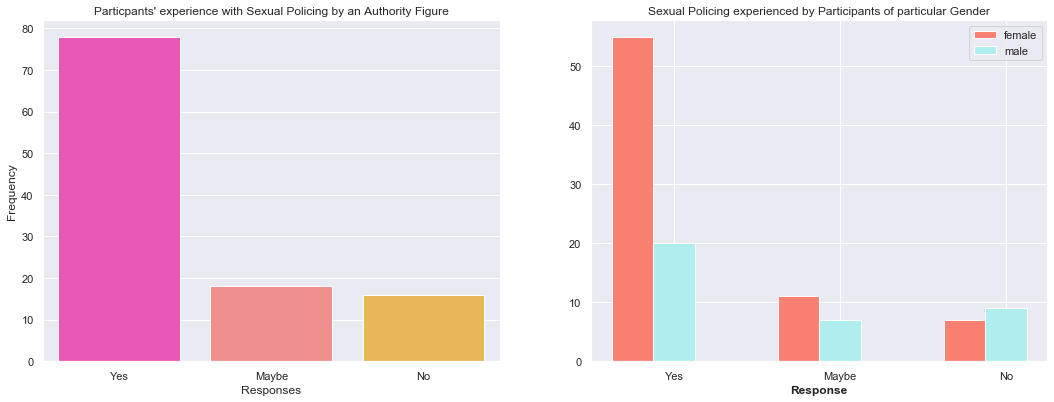

<Figure size 864x451.44 with 0 Axes>

In [12]:
f, axes = plt.subplots(1, 2, figsize =(18,6.27))
# plot raw sexual policing data
police_df = pd.DataFrame()
policing = dict(survey["Sexual Policing "].value_counts())
police_df["Responses"] = policing.keys()
police_df["Frequency"] = policing.values()
police_bar = sns.barplot(x = "Responses",y = "Frequency", data = police_df, orient = "v", palette = 'spring', ax = axes[0]);
police_bar.set(title = "Particpants' experience with Sexual Policing by an Authority Figure");

# plot gender specific data
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [yes_dict['Female'],m_dict['Female'],no_dict['Female']] #female
bars2 = [yes_dict['Male'],m_dict['Male'],no_dict['Male']] #male
#bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color ='salmon', width = barWidth,label='female');
plt.bar(r2, bars2, color ='paleturquoise', width = barWidth,label='male');
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3');
 
# Add xticks on the middle of the group bars
plt.xlabel('Response', fontweight='bold');
plt.xticks([r + barWidth for r in range(len(bars1))], ['Yes', 'Maybe', 'No']);
plt.title("Sexual Policing experienced by Participants of particular Gender");

# Create legend & Show graphic
plt.legend();
plt.show();

sns.despine(left=True);

# TEXTUAL ANALYSIS ON FREE RESPONSE ANSWERS
***
The aim of this segment of data analysis is to portray whether the youth of India is satisfied of dissatisfied with the way the topics in this survey are addressed in the study. It's meant to encapsulate all of the above perceptual questions and act as a platform for participants to share their diverse experiences in the Indian Education System.


## _Q: 'How do you think these topics were approached in your school environment?'_

The free responses that I am analyzing in this section are answers to the question, above. I believe that topics extracted will indicate dissatisfaction and discontent. Although I did see a few positive responses in the survey, it is my opinion that the majority opinion will be one of discontent. 

The data, which was downloaded as a csv. file from Google forms, had to be manually cleaned up before I could begin the text preprocessing. There were a lot of unintended white spaces, typographic errors, abbreviations, incorrectly formatted digits that I had to correct prior to computationally cleaning up the data. It made me realize that keeping end goals and the methods with which you will be analyzing your data at the back of your mind, will always help design better suited data collection surveys, interviews etc. Had I done that; the cleaner data I would have obtained would have saved me a lot of time in the preprocessing steps.


## Text Preprocessing

In [13]:
response = list(survey["Free Response"])
response[0:2]

['In India (Mumbai) it was introduced very briefly and done in a manner that boys and girls had separate trainings. This sort of defeated the point of normalizing sex related topics as we were not allowed to discuss it freely. In LA, these topics were more normalized (especially via mandatory trainings and online courses that had to be fulfilled prior to beginning freshman year courses).',
 'Being in an all-boys school, I think they took this pretty casually as it was so commonplace.']

### Removing Punctuations

In [14]:
#remove punctuations and save in new list
from string import punctuation
text_processed = []
for r in response:
    for char in punctuation:
        r = r.lower().replace(char,"")
    text_processed.append(r)
text_processed[0:2]

['in india mumbai it was introduced very briefly and done in a manner that boys and girls had separate trainings this sort of defeated the point of normalizing sex related topics as we were not allowed to discuss it freely in la these topics were more normalized especially via mandatory trainings and online courses that had to be fulfilled prior to beginning freshman year courses',
 'being in an allboys school i think they took this pretty casually as it was so commonplace']

In [15]:
#add the processed text to our dataframe for use later
survey["Text processed"] = text_processed

In [16]:
# Save the "Text_processed" list as one long string
long_string = ','.join(text_processed)
#long_string

### Tokenization & Removing Stopwords

In [17]:
#Tokenize long string
es_tokens = long_string.split()

#Remove stop words
stop = stopwords.words("english")
no_stop = [word for word in es_tokens if word not in stop]

#define a string without stop words
unique_string=(" ").join(no_stop)

# a copy for later use
copy = no_stop 

## Short Text Topic Modeling

### Learning the Vocabulary

In [18]:
# Define an empty bag (of words)
vectorizer = CountVectorizer()

# Use the .fit method to tokenize the text and learn the vocabulary
vectorizer.fit(survey["Text processed"])

# Print the vocabulary
#vectorizer.vocabulary_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Encoding the Documents

In [19]:
vector = vectorizer.transform(survey["Text processed"])
print(vector) #
#
#
#
#
#print(vector.shape)
#print(type(vector))

  (0, 25)	1
  (0, 31)	3
  (0, 42)	1
  (0, 64)	1
  (0, 68)	1
  (0, 83)	1
  (0, 86)	1
  (0, 157)	2
  (0, 174)	1
  (0, 191)	1
  (0, 200)	1
  (0, 233)	1
  (0, 281)	1
  (0, 282)	1
  (0, 284)	1
  (0, 295)	1
  (0, 313)	2
  (0, 355)	3
  (0, 364)	1
  (0, 381)	1
  (0, 386)	2
  (0, 399)	1
  (0, 426)	1
  (0, 427)	1
  (0, 449)	1
  :	:
  (110, 480)	1
  (110, 485)	1
  (110, 490)	1
  (110, 509)	1
  (110, 587)	1
  (110, 614)	1
  (110, 672)	1
  (110, 713)	1
  (110, 733)	2
  (110, 757)	1
  (110, 792)	2
  (110, 799)	1
  (110, 817)	1
  (111, 2)	1
  (111, 265)	1
  (111, 283)	1
  (111, 311)	1
  (111, 313)	1
  (111, 405)	1
  (111, 650)	1
  (111, 725)	2
  (111, 727)	1
  (111, 733)	1
  (111, 785)	1
  (111, 798)	1


In [20]:
# View as a multidimensional array before converting to data frame
# Rows are the documents
# Columns are the terms

print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [21]:
# What are the terms?

vectorizer.get_feature_names()

['ability',
 'able',
 'about',
 'above',
 'academics',
 'accepted',
 'accolades',
 'acknowledging',
 'action',
 'actions',
 'actually',
 'additional',
 'additionally',
 'addressed',
 'addressing',
 'adults',
 'affects',
 'affiliated',
 'aforementioned',
 'after',
 'again',
 'against',
 'age',
 'all',
 'allboys',
 'allowed',
 'alma',
 'also',
 'always',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'appointed',
 'appreciation',
 'approached',
 'appropriately',
 'are',
 'aren',
 'arent',
 'around',
 'as',
 'asked',
 'aspects',
 'assemblies',
 'assembly',
 'assume',
 'at',
 'attacked',
 'attention',
 'authorities',
 'authority',
 'avoid',
 'avoided',
 'aware',
 'awareness',
 'away',
 'awfully',
 'awkward',
 'bad',
 'badly',
 'barely',
 'basic',
 'be',
 'because',
 'been',
 'before',
 'beginning',
 'behavior',
 'being',
 'believe',
 'believed',
 'best',
 'better',
 'between',
 'big',
 'biology',
 'blind',
 'board',
 'books',
 'both',
 'boy',
 'boys',
 'bras',
 'brief',
 'briefly',
 'brilliant'

### Extract Bigrams

Bigrams are two adjacent elements from a string of tokens. Bigrams help place words and phrases into context. For instance, in a United Nations document, a model may classify 'human' and 'rights' as two different tokens and hence provide us with word frequencies for both, separately. However, given the context, word frequency of the *bigram* 'human rights' would be more insightful. This is why extracting bigrams is helpful. 

In my project, there weren't any distinct bigrams as far as I could tell. This could be due to the short nature of the responses and the small size of the data set, overall. It was definitley still worth running the data through a bigram analyser.



In [22]:
# What other processing steps could you include here
# ... instead of doing them manually above? 
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b', 
                                    min_df = 1)
bigram_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b\\w+\\b', tokenizer=None,
                vocabulary=None)

In [23]:
# Analyze long_string in the bigram bag of words
analyze = bigram_vectorizer.build_analyzer()

vocab = analyze(unique_string)

### Metrics of Word Frequency

Word frequency analysis can be a double-edged sword. On one hand, word frequencies offer a lot of "big-picture" insight into our data set. Borrowing from the UN example that I used before, looking at the (potentially high) frequency of the bigram 'human rights' and interpreting whether other frequent words in the corpus together form a political, social or internationally characterized lexicon would lead us to infer that the corpus consists of documents from UN or a similar organization. However, only looking at 'human' or 'rights' word frequencies might not lead us to the same conclusion. Thus, in computational approaches to social science, a humanistic understanding of the source and context of your data set is always helpful.

Word Frequency analysis on my dataset could prove helpful because of its small size. I know that this dataset contains participants' responses to questions regarding topics covered in our education system. From the age demographics, I know that they are primarily in the range of 19-20. This in conjunction with other information helps put certain word frequency results in context and hence, understand them better. I will provide specific examples of where context-driven interpretations are helpful, alongside the visualizations of word-frequency metrics.


In [24]:
# Show the 20 most commons
freq = Counter(vocab)
stop_df = pd.DataFrame(freq.most_common(20), columns = ["Word", "Frequency"])
stop_df #the difference is that now the bigrams are aligned

,Word,Frequency
0,topics,38
1,school,35
2,girls,19
3,students,17
4,think,13
5,discussed,12
6,teachers,12
7,covered,11
8,t,11
9,schools,10


#### WORDCLOUD

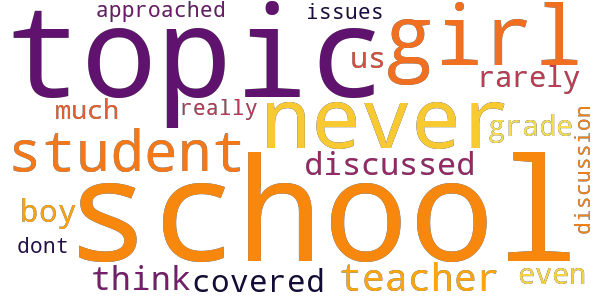

In [25]:
# Define a word cloud variable
cloud = WordCloud(background_color = None, 
                  max_words = 20, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 6, colormap= 'inferno', mode = "RGBA")

# Process the word cloud
cloud.generate(unique_string)

# Visualize!
#cloud.to_file('WordCloud.png')
cloud.to_image()

One of the primary advantages of a Word Cloud as a visualization is that the frequent words _jump_ out at you almost immediately. It's easy to note some words that take up the most space = 'topic', 'school', 'never', 'girl', 'student', 'discussed' etc. Taken in isolation, they indicate a culture of schools never (or rarely) discussing, 'approaching' or 'covering' such topics as those asked in the question.

An example of the context driven interpretation that I mentioned can be seen in the word 'grade'. As an Indian and an individual who has gone over their dataset many times, I understand that in this context, 'grade' is used to refer to numerical levels of education, such as the 5th grade or the 8th grade. Here, it does not mean 'grade' as in to assign a grade such as A, B+ or F.



#### BARPLOT

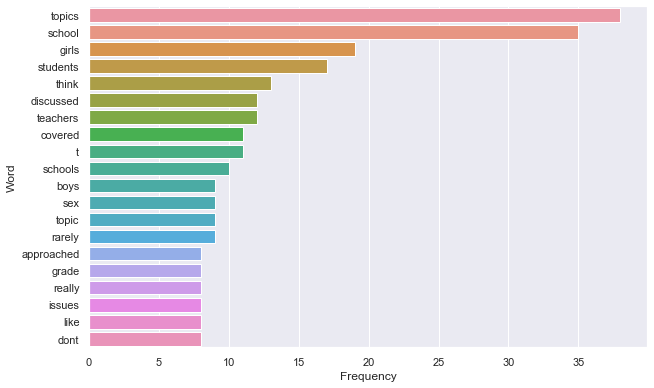

In [26]:
sns.set(rc={'figure.figsize':(10,6.27)})
hr_barplot = sns.barplot(x = "Frequency", 
                         y = "Word", 
                         data = stop_df, 
                         orient = "h")
#plt.savefig('Frequency of Words Barplot.png', dpi = 180, bbox_inches='tight', transparent = True)

Here is a different way of visualizing the same data since looking at them differently sometimes provides different insights. This is a bar plot of the 20 most frequently used words in our responses. They represent the same corpus of words shown in the Word cloud. 

Insolation, they don't indicate much. The two most common words 'topics' and 'school' are not surprising because they are what the survey question asks about. Almost every participant would have used those as anchors to provide relevant answers to the question. However, when considered in conjunction with our demographic and curricular data, the words gain context, and hence make more sense. 

For instance, we know that participants felt that a vast majority of topics detailed in the survey were 'Never' discussed (Heatmap). This adds additional weight to words such as 'discussed', 'approached', 'issues', 'dont', 'covered', 'think'. This cluster of frequent words, combined with high frequency of 'never' and 'rarely' from this section, and the high rates of 'Never' and low rates of 'Very Frequently' from the heatmap, spin a narrative centered on the characters of 'girls', 'boys' and 'teachers’. If each of those characters independently have a high enough word-frequency to make it on the 'top 20' list, it is reasonable to assume that they were addressed as independent entities in the free responses by participants. I'm hesitant to say that 'girls' and 'boys' being mentioned frequently and separately is indicative of gender disparity when it comes to addressing these topics. Due to the large number of female identifying participants in the survey, it is possible that the personal experiences of girls were talking about more in the responses - resulting in the higher frequency of 'girls' because of that. 

Either way, I hypothesis that there continues a narrative of teachers rarely addressing or approaching topics in the survey that students in school are interested in.  

### Fitting our Topic Model

Here I'm using Term frequency-inverse document frequency (TFIDF) wherein words with higher frequency in a response are rated lower (inverse document frequency) in order to build the Document Term Matrix (DTM). TFIDF will encode in a way that preserves the importance of words (in terms of frequency) while a Bag of Words model will simply create a matrix based on word count. This is my rationale behind choosing the TfidfVectorizer( ).  

In [27]:
# How many topics?
n_topics = 4


Our dataset is small; therefore, I believe that there won't be a large number of topics to extract. Considering more than 5 will result in considerably overlapping topics. Even 5 gave me topics that didn't seem to have an overarching point. Settled for 3

In [28]:
# TfidfVectorizer to create the DTM
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90,
                                   max_features = 5000,
                                   stop_words = "english")

# Fit
tfidf = tfidf_vectorizer.fit_transform(copy)

In [29]:
# Instantiate our LDA model
lda = LatentDirichletAllocation(n_components = n_topics, 
                                max_iter = 20, 
                                random_state = 9)
lda = lda.fit(tfidf)

In [30]:
#function to display topics in a formatted manner
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print()

#### TOPIC EXTRACTION 

In [31]:
# Return the topics
tf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
discussed sex approached people health addressed teacher feel actually college sexual institution know team problems related class touched menstruation talk

Topic #1:
topics school schools really education important certain environment sports lot way used level good life introduced crime took obey carpet

Topic #2:
girls students covered boys rarely gender spoken discuss tried mental talking importance talked allowed different curriculum seminars faced separate social

Topic #3:
think teachers topic dont like issues grade things werent discussions taught pretty went deemed weren repercussions surface open considered sessions


#### VISUALISATION & MULTIDIMENSIONAL SCALING (PCA)

In [32]:
panel = pyLDAvis.sklearn.prepare(lda_model = lda, 
                                 dtm = tfidf, 
                                 vectorizer = tfidf_vectorizer, 
                                 mds = "PCoA")
pyLDAvis.display(panel)

\*The Topic numbers are based on the pyLDAvis and not the printed topics - they are the same, only different in numbering. 

#### TOPICS EXTRACTED

|Topic # |Overarching Topic        | Relevent Words
|:-:     |:-:                      |:-:
|1       |Treated as Hostile       |crime, obey, authority,harassment,taking, right, girl, introduced, important, topics, school, education
|2       |Rare Dialogue on Gender & Mental Health   |girls, boys, students, covered, rarely, gender, spoken, discuss, tried, mental, talked, importance, different, curriculum, separate, social,workshops, need, wore, planning 
|3       |Taught not Discussed     |think, teachers, topic, dont, like, issues, werent, discussions, taught, repercussions, surface, sessions, taboo, didnt, tackle
|4       |Emphasis on Health       |discussed, sex, health, approached, teacher, college, sexual, institution, problems, related, touched, menstruation, mentality, discrimination, opinion, rules, given, equality, policing, situation


## Contextual Similarity using Word2Vec

In [33]:
# First, store the documents we want to explore in a separate dataframe with just one column
w2v_df = pd.DataFrame({'Processed': survey["Text processed"]})
#w2v_df

In [34]:
# Turn the text of each row into a list
# We now have a list of lists - one for each document
split_rows = [row.split() for row in w2v_df['Processed']]
#split_rows

In [35]:
no_stop = []
for response in split_rows:
    no_stop.append([word for word in response if word not in stop])
#no_stop

### Define Model

There were two possible methods of vectorizing the words: skip grams or CBOW (Continuous Bag Of Words). The essential difference between the two is that in CBOW, context (a set of words within a fixed window) is used to predict the word in the middle, while for Skip grams, the model learns to predict a word using another nearby word. I decided to go with CBOW even though Skip grams are better for smaller amounts of data because CBOW is better at predicting in a data set that contains more frequent words. Free responses contain a lexicon of daily speech. They are unlikely to contain rare words. Therefore, in my opinion CBOW will give me better accuracy.

In [36]:
# Define the word2vec model
model = gensim.models.Word2Vec(no_stop, 
                               min_count = 2,
                               size = 12, 
                               workers = 1, 
                               window = 3, 
                               sg = 0)


In [37]:
# Save the vocabulary 
words = list(model.wv.vocab)

### Some Interesting Insights

#### Comparing Similarities

In [43]:
model.similarity("topics", "school")

0.016019769

#### "Pick the Odd One Out"

In [44]:
model.doesnt_match(["sex","school","topics","discussed"])

'school'

#### "Most Similar To"

In [45]:
model.wv.most_similar(negative = ["sex","topics","teachers","school"], topn = 5)

[('pretty', 0.820723295211792),
 ('training', 0.7229318022727966),
 ('shirtless', 0.6807460188865662),
 ('actions', 0.6545418500900269),
 ('rules', 0.5551646947860718)]

In [46]:
model.wv.most_similar(positive = ["education","sex"], topn = 5)

[('disciplinary', 0.6693217754364014),
 ('covered', 0.5984655022621155),
 ('bad', 0.5979328155517578),
 ('policing', 0.589743971824646),
 ('seen', 0.5874642729759216)]

In [47]:
model.wv.most_similar(negative = ["school","curriculum"], topn = 5)

[('must', 0.7328099608421326),
 ('class', 0.6630020141601562),
 ('freely', 0.6044854521751404),
 ('tried', 0.573231041431427),
 ('biology', 0.5199291110038757)]

**Education is to Sex what Discussed is to ___________**

In [48]:
model.wv.most_similar(positive = ["discussed", "sex"],negative = ["education"])[0][0]

'open'

**Words that are more than 50% similar to 'sex'**

In [49]:
[word for word in words if model.similarity("sex",word) > 0.5]

['sex',
 'tried',
 'bad',
 'history',
 'actions',
 'part',
 'sixth',
 'mostly',
 'minute',
 'policing']

In [55]:
# Save the word2vec vocab
features = model[model.wv.vocab]

### Visualization and Multidimensional Scaling with PCA
***

I picked PCA over TSNE (T-distributed stochastic neighbor embedding) because TSNE only forms clusters when data is non-sparse. While I do have a sizeable amount of data, it was not enough for it to form clusters when passed through TSNE algorithm. Therefore, I decided to go ahead with PCA.

#### Principal Component Analysis

I have used Principle Component Analysis (PCA) which is a form of feature extraction for reduced dimensionality of data. It works by separating points as far as possible. It tells us three things:

1. Direction in which our data is dispersed
2. How each variable is associated with one another 
3. Relative importance of different directions. 

The code below plots our Word2Vec word model on a 2D graph. Although not shown here, the points are plotted in relation to a "best fit line". PCA will find the best line that both maximizes the variance as well as minimizes distance error (difference between best-fit line and data point). I will be interpreting the data on the bases of (2) which is to analyze clusters of words on the graph. The distance between words indicates which words are closest together in 2D space.

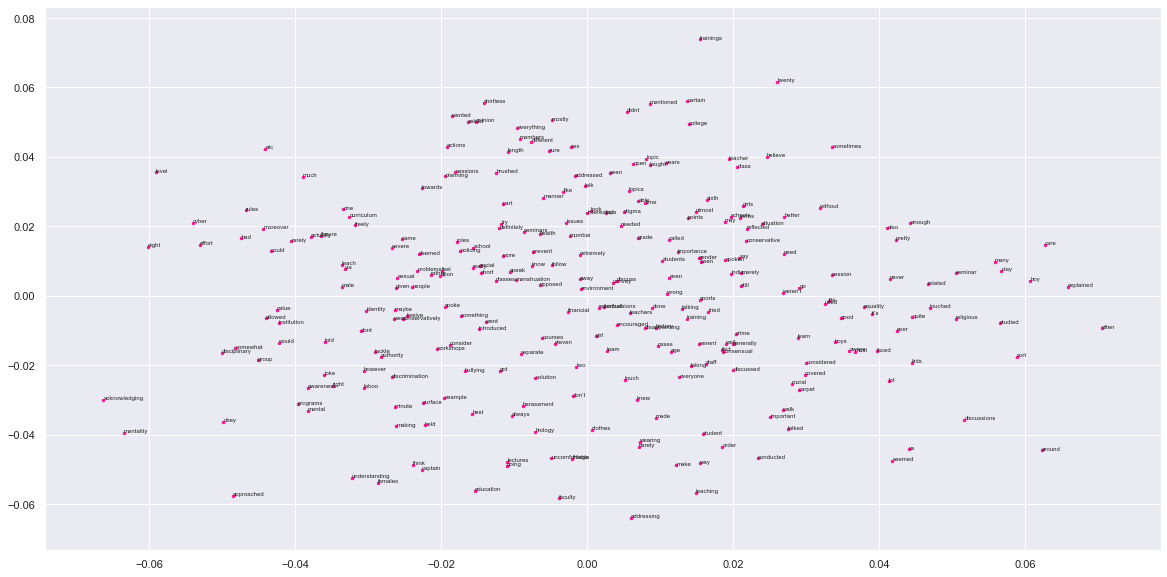

In [66]:
# Define parameters of our PCA

# Just look at the first two dimensions - the X and Y axes

for_pca = PCA(n_components = 2)
pca_out = for_pca.fit_transform(features)
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'figure.figsize':(20,10)})
vocab = list(model.wv.vocab)
X = model[vocab]
for_pca = PCA(n_components = 2, random_state= 5)
pca_out = for_pca.fit_transform(features)
df = pd.DataFrame(pca_out, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'],s=6, color = 'deeppink')
for word, pos in df.iterrows():
    ax.annotate(word, pos)
#plt.savefig('PCA Word2vec Plots.png', dpi = 240, bbox_inches='tight')


# RESULTS 


![image info](images/match.png "Pick the Odd one")

![image info](images/num1.png "Similarity")
![image info](images/num2.png "Similarity")
![image info](images/num3.png "Similarity")

# DISCUSSION
***

## Limitations of Data

**SIZE OF DATASET**
The biggest problem that I had with Word2Vec. Every time I ran my model, it would give me different outputs. A standard analysis become near-impossible. I tried to modify the parameters in order to run the model in a deterministic manner (fixed worker = 1, seed, custom hash function etc.) However, nothing worked. According to FAQs on the RaRe technologies GitHub, Word2Vec does that when the data used to train the model is too little. In this case, I thought it would be best to include some outputs that I had received while working on my project and analyze them. 

**REPRESENTATIVENESS OF DATA**
To talk a little more about the assumptions I have made for this topic, it is important to keep in mind that the population sampled in this survey would not be absolutely representative of the Indian population OR education system. The demographics of the survey participants show that they are primarily from well-developed metropolitan areas (Mumbai). India is extremely diverse as a nation and there are many pockets even within uniform states where the differences (both ideological and tangible) between the rural and urban are massive. Additionally, the female dominated gender identity in this data set could have affected many parts of the responses such as the ratings of importance of the topics to be included in school curriculum as well as the free response data. I believe females would have naturally voted topics such as Sexual Harassment in Workplace etc. higher than others since it is directly relevant to their gender identity. Similarly, a large proportion of the textual data could have been dominated by female driven experiences.

## Discussion

An important insight for me was the merits of keeping data analysis always at the back of mine while designing surveys or interviews in order to get the best formatted data that will likely save you time when you begin to work on it. When I started this survey, I had not thought through what I hope to achieve by the end of it and thus received data that required manual clean up and standardization before I could begin to process it.

The Perceptual data indicates a strong trend of the youth perceiving lack of information in essential topics related directly or indirectly to sexual education, particularly in the frequency with which they are covered in school. The topics extracted from the LDA Model serve to show the discontent with the current educational curriculum regarding these topics. It is not possible to ignore the fact that youth aren't getting the sexual education that they want in India, and policymakers can no longer hide under the excuse that the students don't want to learn it. I hope my project serves to highlight that not providing accurate, frequent information to the youth on topics that they believe are important in a school curriculum will lead to them turning to less reliable sources such as the internet and entertainment media in order to fill that information gap. This is detrimental to their development into responsible, openminded and well-adjusted adults.

While the survey may not have been completely representative of the target population i.e. the youth of India, it does satisfy its aim of gathering data for a _preliminary_ survey on youth perception. In my opinion, the Demographic and Perceptual Survey Data (the first sections of the notebooks) should be given the most importance due to their objectivity and forced-choice answer design. The textual analysis of the free response should be used as a supplementary resource to back up the results obtained from the first two sections. This would be the best course of action since the Textual Analysis provides us with a "Big Picture" view of the entire dataset along with interpretations of word frequency and similarity and the Demographic/Perceptual Data gives us a metric to weigh the fissure that exists between what the youth want to know and think is important, and their perception of how much of it they are getting in their school environments.  


## Future Direction

The next step would be to present the project and data to Educational Reform institutions in India or Educational Technology companies to make them aware of this knowledge gap that seems to exist within the youth community in India. I believe that they would have the additional resources and expertise that I could use to carry out more surveys and eventually use the data to curate a State (or Central Government) mandated sexual education curriculum for the Indian Certificate of Secondary Education (ICSE) Board, that is dominated by content that the youth is interested in learning about. This curriculum will require faculty to undergo training and participate in workshops to sensitize them to issues that they are out of touch with, before they are allowed to teach them in schools.
***

# WORKS CITED

Muzzall, Evan. Notebook Week 5 [Link](https://github.com/dlab-berkeley/DIGHUM101-2020/tree/master/Notebooks/Week5)

Dave, Pranay. “PCA vs TSNE - El Clásico.” Medium, Towards Data Science, 30 May 2020, [Link](towardsdatascience.com/pca-vs-tsne-el-cl%C3%A1sico-9948181a5f87.) 

Tran, Khuyen. “How to Solve Analogies with Word2Vec.” Medium, Towards Data Science, 29 Mar. 2020, [Link](towardsdatascience.com/how-to-solve-analogies-with-word2vec-6ebaf2354009)

Kulshrestha, Ria. “NLP 101: Word2Vec - Skip-Gram and CBOW.” Medium, Towards Data Science, 19 June 2020,[Link](towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314).

Amipara, Kevin. “Better Visualization of Pie Charts by MatPlotLib.” Medium, Medium, 20 Nov. 2019, [Link](medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f).

Li, Zhi. “A Beginner's Guide to Word Embedding with Gensim Word2Vec Model.” Medium, Towards Data Science, 1 June 2019,[Link](towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92).

Scott, William. “TF-IDF for Document Ranking from Scratch in Python on Real World Dataset.” Medium, Towards Data Science, 21 May 2019, [Link](towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089).

Brems, Matt. “A One-Stop Shop for Principal Component Analysis.” Medium, Towards Data Science, 10 June 2019, [Link](towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

jeffd23. “Visualizing Word Vectors with t-SNE.” Kaggle, Kaggle, 18 Mar. 2017, [Link](www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne).

alvasalvas, et al. “Ensure the Gensim Generate the Same Word2Vec Model for Different Runs on the Same Data.” Stack Overflow, 1 Aug. 1965,  [Link](stackoverflow.com/questions/34831551/ensure-the-gensim-generate-the-same-word2vec-model-for-different-runs-on-the-sam).

Gaudard, Olivier. “#11 Grouped Barplot.” The Python Graph Gallery, 7 Sept. 2017, [Link](python-graph-gallery.com/11-grouped-barplot/).

Raul GonzalesRaul Gonzales et al. “Cant Plot Seaborn Graphs Side by Side.” Stack Overflow, 1 May 1969, [Link](stackoverflow.com/questions/58624647/cant-plot-seaborn-graphs-side-by-side).

DreamsDreams and Niels JoaquinNiels Joaquin 1. “Visualise word2vec Generated from Gensim.” Stack Overflow, 1 Dec. 1966, [Link](stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim).

oceandyeoceandye and CathyQianCathyQian. “How Do I Save Word Cloud as .Png in Python?” Stack Overflow, 1 Apr. 1968, [Link](stackoverflow.com/questions/52464932/how-do-i-save-word-cloud-as-png-in-python).

Robert FrankeRobert Franke et al. “Save a Subplot in Matplotlib.” Stack Overflow, 1 June 1960, [Link](stackoverflow.com/questions/4325733/save-a-subplot-in-matplotlib).

Zagorax, et al. “What Is the Operation behind the Word Analogy in Word2vec?” Stack Overflow, 1 Apr. 1968, [Link](stackoverflow.com/questions/52364632/what-is-the-operation-behind-the-word-analogy-in-word2vec).

alvasalvas “Interpreting Negative Word2Vec Similarity from Gensim.” Stack Overflow, 1 Sept. 1966, [Link](stackoverflow.com/questions/42381902/interpreting-negative-word2vec-similarity-from-gensim).

ShaktiShakti “How to Run Tsne on word2vec Created from Gensim?” Stack Overflow, 1 June 1966,[Link](stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim).